## Scraping Glassdoor Data and Hypothesis Testing
Author: Panya Tang
Date: December 10, 2020

### Scraping Glassdoor Data
This notebook aims to scrape Glassdoor data on company salaries using the Top 50 companies that Wellesley alums work at. The scraping was completed through BeautifulSoup and the individual company salary data were saved into panda dataframes. 

In [4]:
import os
import time

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup as BS
from urllib.request import Request, urlopen

import re
from lxml.html.soupparser import fromstring

import csv
import re

Create a function that scrapes the company name and salary data. The function returns a dataframe and a list with the name. Some of the lines are commented out, but still kept in the code, since they were not used in the final project. For example, the size, headquarters, and Glassdoor blurbs of each company were data we initially wanted to use, but did not at the end. Thus, in an effort to preserve code that could be saved for future use, a more efficient function was not written to only collect salary data and name of the company from the same page.

In [6]:
def companyscraper(url):
    """A function that scrapes salary data and relevant company information given the URL. 
       Returns dataframe with company salary and a list with company name."""
    #headquarters = []
    #values  = []
    hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582'}
    
    #Parse the webpage with BeautifulSoup
    req = Request(url,headers=hdr)
    page = urlopen(req)
    soup = BS(page, "html.parser")
    
    #Find the name of the company and clean title
    namehtml = soup.find('h2', attrs = {'class': 'my-0'})
    name = namehtml.get_text().split("Overview")[0]
    
    #sizehtml = soup.find('li', attrs = {'class': "d-flex align-items-center col-12 col-sm-6 p-0 m-0 pb-sm pr-sm-xxsm"})
    #size = sizehtml.get_text().split(":")[1]
    
    #headquarterhtml = soup.find('li', attrs = {'class': "d-flex align-items-center col-12 col-sm-6 p-0 m-0 pb-sm pl-sm-xxsm"})
    #headquarter = headquarterhtml.get_text()
    
    #valueshtml = soup.find('span', attrs = {'data-test': "employerDescription"})
    #values = valueshtml.get_text() 
    
    #To find the unique employerID that is given to each Glassdoor company, look for html codes with <a> tags 
    # and append href attribute to list
    #Then, look for employer ID in the list
    links_with_text = []
    for a in soup.find_all('a', href = True):
        if a.text:
            links_with_text.append(a['href'])
    for link in links_with_text:
        if 'employerId' in link:
            digits = link.split('=')[1]
            cleanedDigits = re.sub("\D", "", digits)
            
            
    nameOnly = name.split()[0]
   
    # Using company name and employerID, generate link to salary page
    JobTitle = []
    AverageSalary = []
    req = Request('https://www.glassdoor.com/Salary/'+nameOnly+'-Salaries-E'+cleanedDigits+'.htm',headers=hdr)
    page = urlopen(req)
    soup = BS(page, "html.parser")
    Summary = soup.find_all('div', attrs = {'class':'dataTable__DataTableStyle__dataTableModal'})
    removedTag  = re.sub(clean, '', str(Summary))
    splitData = re.split('/',removedTag)
    
    #Create Dataframe that splits out string "reported"
    cleanDataList = []
    for job in splitData:
        cleanDataList.append(job.split('reported'))
      
    #Replace "," and "$" in order to change salary string into integer
    newDf = pd.DataFrame(cleanDataList, columns = ['Job Title', 'Salary'])
    jobDf = newDf.dropna()
    jobDf['Salary'] = jobDf['Salary'].str.replace(",", "", regex = False)
    jobDf['Salary'] = jobDf['Salary'].str.replace("$", "", regex = False)
    jobDf['Salary'] = jobDf['Salary'].astype(int)
            
    return jobDf,[name]

Load alum data and create a counter dictionary of companies that alums work at.

In [7]:
allAlumDf = pd.read_csv('all_alum_data.csv')

In [8]:
allAlumDf['current_employer'].value_counts()
counts = allAlumDf['current_employer'].value_counts().to_dict()

Create list to save all company information. Then, through manually generating the links for each of the top 50 companies, append data to list. 

In [2]:
compilation_list = []

In [11]:
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Google-EI_IE9079.11,17.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Microsoft-EI_IE1651.11,20.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/facebook'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Accenture-EI_IE4138.11,20.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-IBM-EI_IE354.11,14.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Amazon-EI_IE6036.11,17.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Intuit-EI_IE2293.11,17.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Wayfair-EI_IE134525.11,18.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Oracle-EI_IE1737.11,17.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-MIT-Lincoln-Laboratory-EI_IE347032.11,33.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Uber-EI_IE575263.11,15.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Square-EI_IE422050.11,17.htm'))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Cornell-University-EI_IE3732.11,29.htm'))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Apple-EI_IE1138.11,16.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Adobe-EI_IE1090.11,16.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Harvard-University-EI_IE2817.11,29.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Workday-EI_IE197851.11,18.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Northeastern-University-EI_IE23363.11,34.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Booz-Allen-Hamilton-EI_IE2735.11,30.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Goldman-Sachs-EI_IE2800.11,24.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Stanford-University-EI_IE2989.11,30.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Capital-One-EI_IE3736.11,22.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-LinkedIn-EI_IE34865.11,19.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Grab-EI_IE958580.11,15.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-HubSpot-EI_IE227605.11,18.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Tufts-University-EI_IE21675.11,27.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-edX-EI_IE664143.11,14.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-J-P-Morgan-EI_IE145.11,21.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Palantir-Technologies-EI_IE236375.11,32.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Dropbox-EI_IE415350.11,18.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Salesforce-EI_IE11159.11,21.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Alarm-com-EI_IE268820.11,20.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Wellington-Management-EI_IE9606.11,32.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/spotify"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Kayak-com-EI_IE37851.11,20.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Sonos-EI_IE259049.11,16.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-New-Relic-EI_IE461657.11,20.htm"))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Analysis-Group-EI_IE132526.11,25.htm'))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Lyft-EI_IE700614.11,15.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-UBS-EI_IE3419.11,14.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-PayPal-EI_IE9848.11,17.htm"))
compilation_list.append(companyscraper('https://www.glassdoor.com/Overview/Working-at-Etsy-EI_IE42751.11,15.htm'))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-York-University-EI_IE141035.11,26.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Chegg-EI_IE237819.11,16.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-athenahealth-EI_IE18207.11,23.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Bloomberg-L-P-EI_IE3096.11,24.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Walt-Disney-Company-EI_IE717.11,30.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Indeed-EI_IE100561.11,17.htm"))
compilation_list.append(companyscraper("https://www.glassdoor.com/Overview/Working-at-Chewy-EI_IE815856.11,16.htm"))

<ipython-input-3-9c4a32b47c2c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobDf['Salary'] = jobDf['Salary'].str.replace(",", "", regex = False)
<ipython-input-3-9c4a32b47c2c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobDf['Salary'] = jobDf['Salary'].str.replace("$", "", regex = False)
<ipython-input-3-9c4a32b47c2c>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

With a for loop, calculate means for company salary across all positions. Then, append information into dictionary, with company name as the key.

In [62]:
averageSalary = {}

In [67]:
for company in compilation_list:
    name = company[1][0].strip()
    averageSalary[name] = company[0]['Salary'].mean()

averageSalary

{'Google': 122219.35,
 'Microsoft': 134386.45,
 'Facebook': 132978.95,
 'Accenture': 97194.55,
 'IBM': 105195.2,
 'Amazon': 80426.45,
 'Intuit': 134264.55,
 'Wayfair': 78501.55,
 'Oracle': 125136.6,
 'MIT Lincoln Laboratory': 60012.25,
 'Uber': 54463.2,
 'Square': 76243.9,
 'Cornell University': 39820.75,
 'Apple': 99812.65,
 'Adobe': 130137.15,
 'Harvard University': 56408.9,
 'Workday': 156949.15,
 'Northeastern University': 35673.55,
 'Booz Allen Hamilton': 88118.85,
 'Goldman Sachs': 112140.25,
 'Stanford University': 60288.35,
 'Capital One': 93175.95,
 'LinkedIn': 121216.05,
 'Grab': 72949.8,
 'HubSpot': 70012.3,
 'Tufts University': 40645.35,
 'edX': 79292.75,
 'J.P. Morgan': 80010.15,
 'Palantir Technologies': 86153.25,
 'Dropbox': 125660.6,
 'Salesforce': 131052.8,
 'Alarm.com': 45274.9,
 'Wellington Management': 84845.95,
 'Spotify': 133768.65,
 'Kayak.com': 79708.2,
 'Sonos': 92924.75,
 'New Relic': 110215.5,
 'Analysis Group': 96276.2,
 'Lyft': 50163.4,
 'UBS': 86030.4,
 'P

Create barplot for the average salaries for the top 50 companies

In [68]:
import matplotlib.pyplot as plt

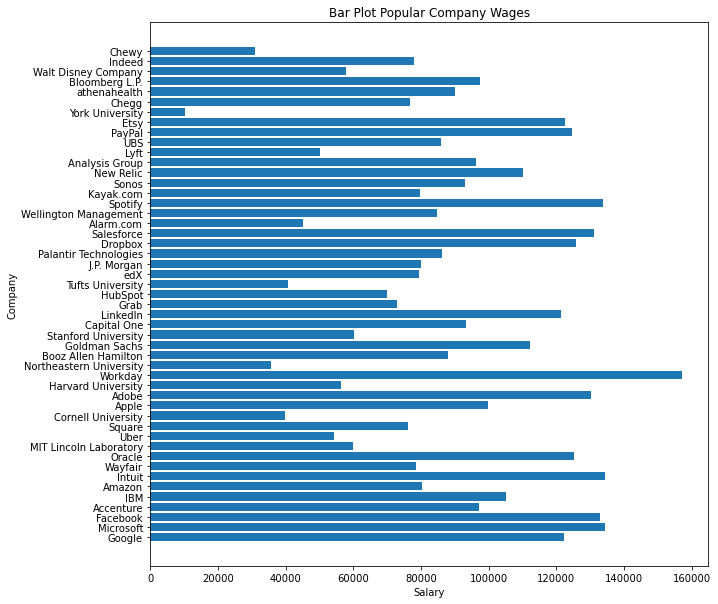

In [69]:
company = list(averageSalary.keys())
salary = list(averageSalary.values())

fig = plt.figure(figsize = (10, 10))

plt.barh(company, salary)
plt.xlabel('Salary')
plt.ylabel('Company')
plt.title("Bar Plot Popular Company Wages")
plt.savefig("companyaveragebarplot.png")

In [76]:
!pip install fuzzywuzzy

### Hypothesis Testing

Read CSV of S&P 500 companies. Using the fuzzywuzzy package, compare company names that are saved in the dictionary to the S&P official names. If fuzzy ratio is more than 55, the company is considered a S&P company. Save each group into a separate dictionary. 

In [77]:
from fuzzywuzzy import fuzz

C:\Users\Panya\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [111]:
sp500Df = pd.read_csv('constituents.csv')
sp500companies = sp500Df['Name'].tolist()
sp500companies

companyDf = pd.DataFrame(averageSalary.items(), columns = ['company', 'salary'])
companyDf['isSP'] = ''

inSP = {}
notinSP = {}
for company in averageSalary:
    for spcompany in sp500companies: 
        ratio = fuzz.ratio(company, spcompany)
        if ratio > 55:
            inSP[company] = averageSalary[company]
    if company not in inSP:
        notinSP[company] = averageSalary[company]

len(notinSP)

26

Create a list of the average salaries for S&P and non-S&P companies

In [114]:
import scipy.stats as stats
from pandas import Series

In [118]:
list(notinSP.values())

[122219.35,
 105195.2,
 54463.2,
 76243.9,
 39820.75,
 56408.9,
 156949.15,
 88118.85,
 60288.35,
 72949.8,
 70012.3,
 40645.35,
 79292.75,
 125660.6,
 45274.9,
 133768.65,
 92924.75,
 110215.5,
 50163.4,
 86030.4,
 122516.4,
 10288.0,
 76746.25,
 89991.25,
 78044.3,
 30921.7]

Conduct a two-sample t-test. Samples have unequal variance and the significance level is 0.025.

In [120]:
twoSampleTest = stats.ttest_ind(list(notinSP.values()), list(inSP.values()), equal_var = False)
twoSampleTest

Ttest_indResult(statistic=-2.121469451491724, pvalue=0.039251577514936374)

In [124]:
from plotly.figure_factory import create_table
matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twoSampleTest[0], twoSampleTest[1]/2]
]

test_table = create_table(matrix_twosample, index=True)
test_table.show()